In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [5]:
df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [7]:
cat_col = df.select_dtypes(exclude='object').columns

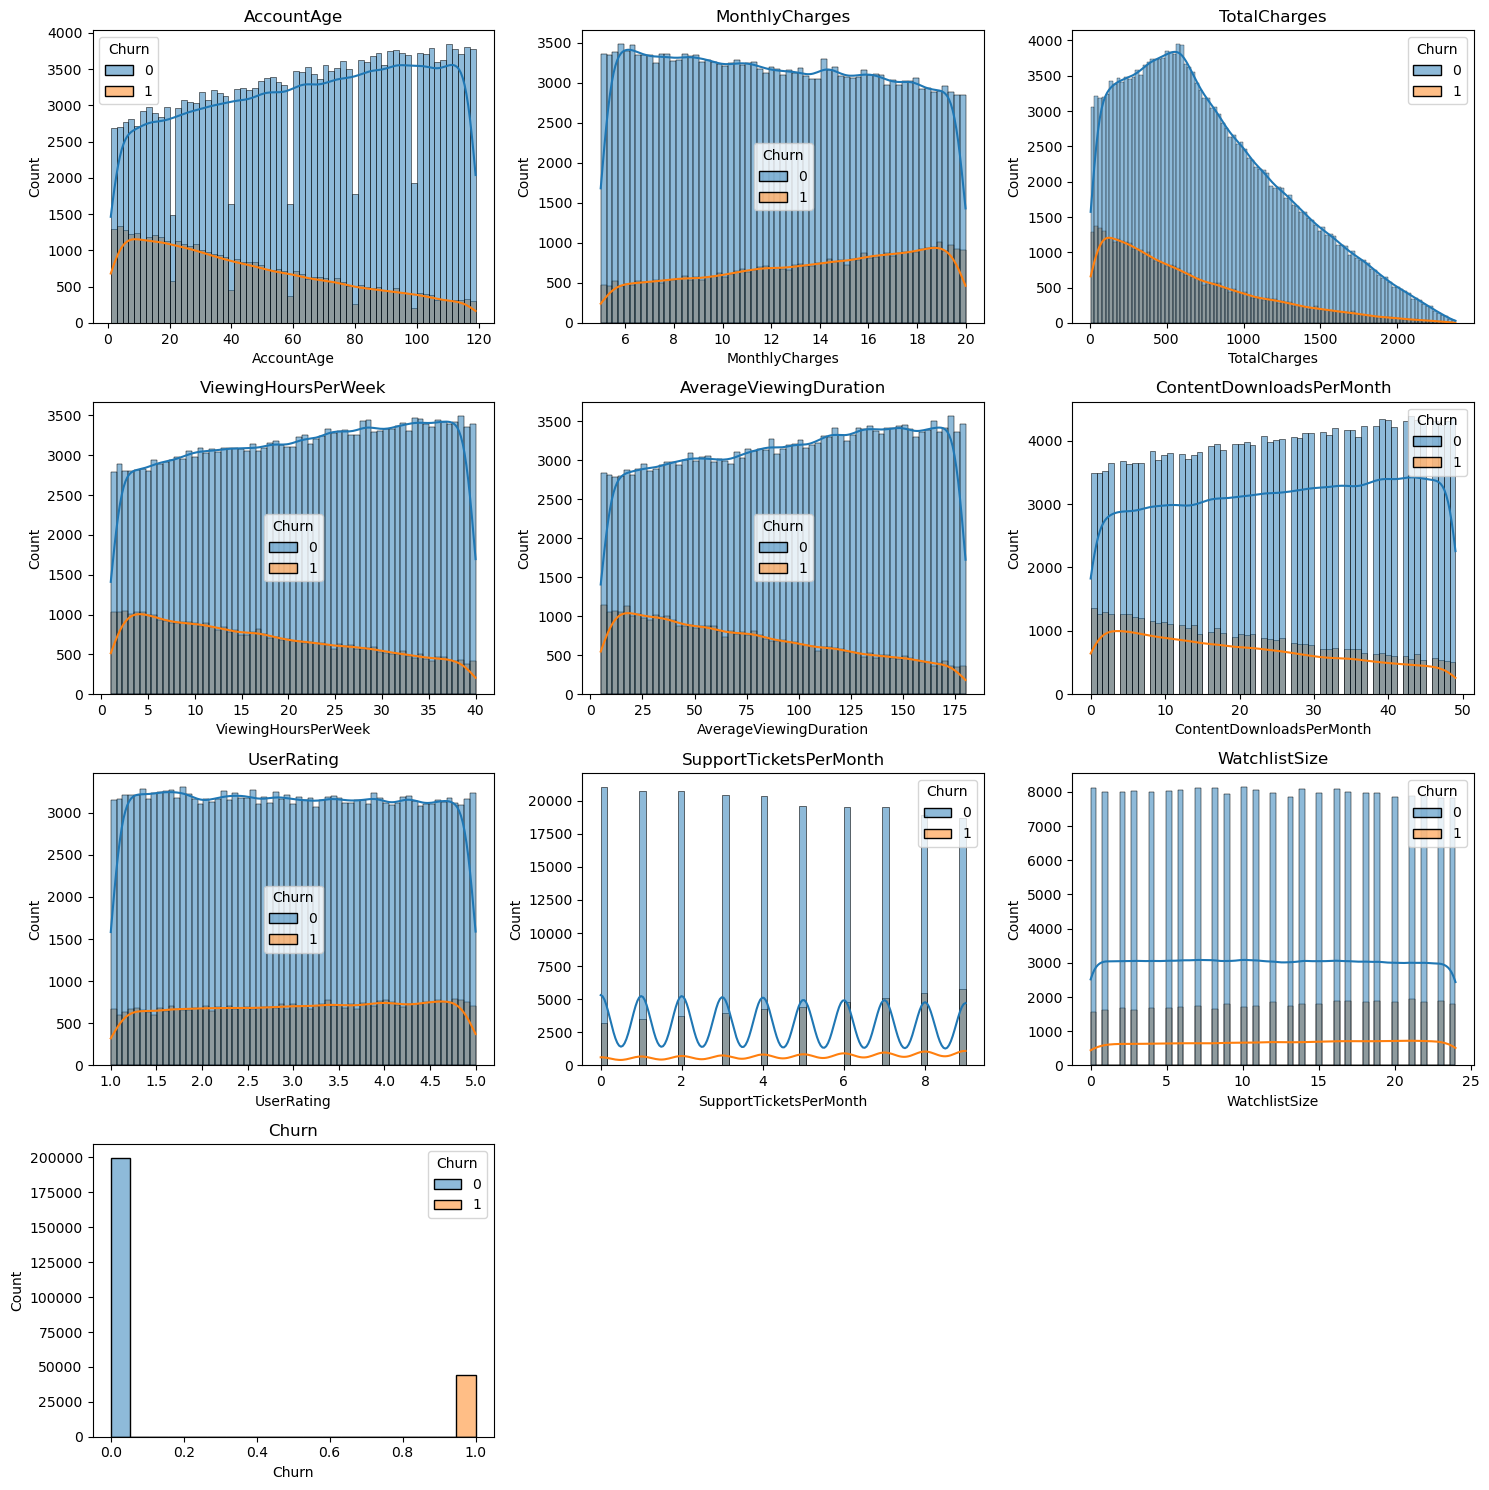

In [15]:
plt.figure(figsize=(15,15))
for i,j in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.histplot(df,x=j,hue='Churn',kde=True)
    plt.title(j)

plt.tight_layout()

In [20]:
plt.figure(figsize=(15,15))
for i,j in enumerate(df.select_dtypes(include='object').columns):
    plt.subplot(3,4,i+1)
    sns.countplot(df,x=j,hue='Churn')
    plt.title(j)

plt.tight_layout()

KeyboardInterrupt: 

In [1]:
len(df.select_dtypes(include='object').columns)

NameError: name 'df' is not defined

# devide the data
data for training and data use as a real life use case example

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train, use_case = train_test_split(df,test_size=.03)
use_case.shape

(7314, 21)

# preprocessing

In [18]:
train

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
116713,70,17.216639,1205.164759,Basic,Credit card,Yes,Both,Yes,TV,8.778337,...,47,Fantasy,1.372410,4,Female,9,Yes,No,7KH3CGOYT8,0
167124,87,5.926703,515.623204,Basic,Bank transfer,Yes,TV Shows,No,TV,23.903064,...,15,Drama,4.839216,1,Female,1,Yes,Yes,YMQ6TTV6PL,0
237598,112,16.350514,1831.257550,Standard,Mailed check,Yes,Both,No,Mobile,18.676031,...,41,Comedy,4.410249,8,Male,20,Yes,No,KSAIN9X9D8,0
134953,24,6.058327,145.399850,Premium,Credit card,No,Both,No,TV,18.584281,...,22,Comedy,2.258105,0,Male,2,Yes,Yes,I50RS39U5G,1
68904,90,7.819888,703.789944,Basic,Mailed check,Yes,Both,No,TV,26.268527,...,19,Action,4.414157,2,Male,5,No,Yes,QNGMG52X5B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155605,10,14.848403,148.484025,Premium,Bank transfer,No,Movies,No,Mobile,28.271944,...,34,Action,1.665337,8,Female,22,No,No,Z2NL85AINS,0
74648,57,5.859487,333.990752,Basic,Electronic check,No,TV Shows,Yes,Tablet,10.393126,...,7,Fantasy,3.064246,0,Male,22,No,No,61C9LW72E3,0
114142,4,12.986629,51.946517,Basic,Bank transfer,No,Both,No,Mobile,39.451614,...,14,Action,4.307849,7,Female,4,Yes,No,4VQ4JMO80W,1
86157,114,6.827516,778.336838,Standard,Bank transfer,Yes,Both,Yes,TV,32.533347,...,3,Sci-Fi,4.883269,7,Female,10,No,Yes,SJQZTNGDYV,0


In [48]:
encoder = {}
for i,j in enumerate(train.drop('CustomerID',axis=1).select_dtypes(include='object').columns):
    a,b = pd.factorize(train[j])
    encoder[j] = {y:x for x,y in zip(set(a),b)}

In [49]:
encoder

{'SubscriptionType': {'Basic': 0, 'Standard': 1, 'Premium': 2},
 'PaymentMethod': {'Credit card': 0,
  'Bank transfer': 1,
  'Mailed check': 2,
  'Electronic check': 3},
 'PaperlessBilling': {'Yes': 0, 'No': 1},
 'ContentType': {'Both': 0, 'TV Shows': 1, 'Movies': 2},
 'MultiDeviceAccess': {'Yes': 0, 'No': 1},
 'DeviceRegistered': {'TV': 0, 'Mobile': 1, 'Computer': 2, 'Tablet': 3},
 'GenrePreference': {'Fantasy': 0,
  'Drama': 1,
  'Comedy': 2,
  'Action': 3,
  'Sci-Fi': 4},
 'Gender': {'Female': 0, 'Male': 1},
 'ParentalControl': {'Yes': 0, 'No': 1},
 'SubtitlesEnabled': {'No': 0, 'Yes': 1}}

In [51]:
train.replace(encoder,inplace=True)

In [52]:
train

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
116713,70,17.216639,1205.164759,0,0,0,0,0,0,8.778337,...,47,0,1.372410,4,0,9,0,0,7KH3CGOYT8,0
167124,87,5.926703,515.623204,0,1,0,1,1,0,23.903064,...,15,1,4.839216,1,0,1,0,1,YMQ6TTV6PL,0
237598,112,16.350514,1831.257550,1,2,0,0,1,1,18.676031,...,41,2,4.410249,8,1,20,0,0,KSAIN9X9D8,0
134953,24,6.058327,145.399850,2,0,1,0,1,0,18.584281,...,22,2,2.258105,0,1,2,0,1,I50RS39U5G,1
68904,90,7.819888,703.789944,0,2,0,0,1,0,26.268527,...,19,3,4.414157,2,1,5,1,1,QNGMG52X5B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155605,10,14.848403,148.484025,2,1,1,2,1,1,28.271944,...,34,3,1.665337,8,0,22,1,0,Z2NL85AINS,0
74648,57,5.859487,333.990752,0,3,1,1,0,3,10.393126,...,7,0,3.064246,0,1,22,1,0,61C9LW72E3,0
114142,4,12.986629,51.946517,0,1,1,0,1,1,39.451614,...,14,3,4.307849,7,0,4,0,0,4VQ4JMO80W,1
86157,114,6.827516,778.336838,1,1,0,0,0,0,32.533347,...,3,4,4.883269,7,0,10,1,1,SJQZTNGDYV,0
